Este colab fue desarrollado por Arnold Charry Armero.

# Suavización Exponencial Triple - Modelo Multiplicativo de Holt-Winters

Para las series de tiempo en las que se presenta estacionalidad, se utilizan métodos que la tomen en cuenta. El método de Suavización Exponencial Triple le incluye a la Suavización Exponencial Doble la estacionalidad. Es importante considerar la estacionalidad, ya que a pesar de que exista una tendencia, eso no quiere decir que siempre todos los datos van a ir en crecimiento o decrecimiento. Por medio de las siguientes cuatro ecuaciones se implementa el Modelo Multiplicativo de Holt-Winters.

$$ F_{t} = \alpha \begin{pmatrix}
\frac{D_{t}}{S_{t-L}}
\end{pmatrix} + (1-\alpha) (F_{t-1} + T_{t-1}) $$

$$ T_{t} = \beta (F_{t} - F_{t - 1}) + (1 - \beta ) T_{t-1} $$

$$ S_{t} = \delta \begin{pmatrix}
\frac{D_{t}}{F_{t}}
\end{pmatrix} + (1 - \delta  ) S_{t-L} $$

$$ FIT_{t} = ( F_{t} \: + \: mT_{t} ) S_{t+m-L}$$

donde,

$ F_{t} = \mathrm{Pronostico \: Suavizado} $

$ F_{t-1} = \mathrm{Pronostico \: Anterior \: Suavizado} $

$ \alpha = \mathrm{Constante \: de \: Suavizacion} \: (0 \leq \alpha \leq 1)$

$ D_{t} = \mathrm{Demanda \: Real \: en \: el \: periodo \: actual} $

$ T_{t} = \mathrm{Tendencia \: Suavizada} $

$ T_{t-1} = \mathrm{Tendencia \: Anterior \: Suavizada} $

$ \beta = \mathrm{Constante \: de \: Tendencia} \: (0 \leq \beta \leq 1)$

$ L = \mathrm{Periodos \: previos \: tomados \: en \: cuenta} $

$ m = \mathrm{Periodos  \: tomado \: como \: base} $

$ \delta  = \mathrm{Constante \: de \: Estacionalidad} \: (0 \leq \delta  \leq 1)$

$ S_{t} = \mathrm{Estacionalidad \: Suavizada} $

$ S_{t+m-L} = \mathrm{Estacionalidad \: Suavizada \: L \: periodos \: previos \: con \: m \: periodo \: como \: base} $

$ S_{t-L} = \mathrm{Estacionalidad \: Suavizada \: L \: periodos \: previos} $

$ FIT_{t} = \mathrm{Nuevo \: Pronostico \: con \: tendencia \: y \: estacionalidad} $

Ahora se continua con la implementación en código.

In [1]:
#Se importan las librerias
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

In [2]:
#Conectamos con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Se ingresa la base de datos
df = pd.read_csv("/content/drive/MyDrive/Operations I/sales-cars.csv")
df.head(10)

,Month,Sales
0,2016-01,266.0
1,2016-02,146.0
2,2016-03,183.0
3,2016-04,119.0
4,2016-05,180.0
5,2016-06,169.0
6,2016-07,232.0
7,2016-08,225.0
8,2016-09,193.0
9,2016-10,123.0


In [4]:
#Se pasa al formato de series de tiempo
df["Month"] = pd.to_datetime(df.iloc[:, 0], format = '%Y/%m')
df.head(10)

,Month,Sales
0,2016-01-01,266.0
1,2016-02-01,146.0
2,2016-03-01,183.0
3,2016-04-01,119.0
4,2016-05-01,180.0
5,2016-06-01,169.0
6,2016-07-01,232.0
7,2016-08-01,225.0
8,2016-09-01,193.0
9,2016-10-01,123.0


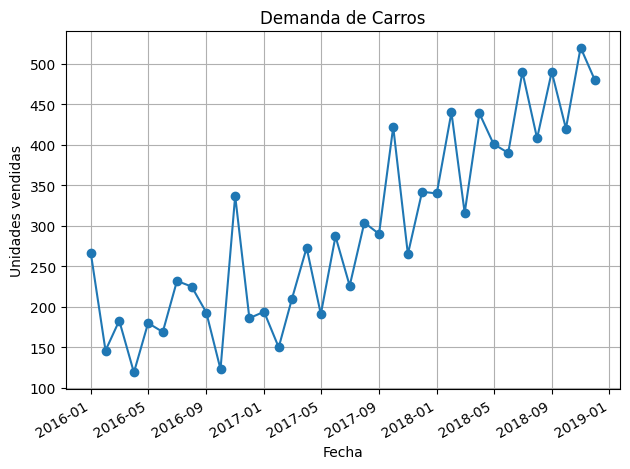

In [5]:
#Se realiza el gráfico de los datos
plt.plot_date(df.iloc[:, 0], df.iloc[:, 1], linestyle = 'solid')
plt.gcf().autofmt_xdate()

plt.title("Demanda de Carros")
plt.xlabel("Fecha")
plt.ylabel("Unidades vendidas")

plt.grid()
plt.tight_layout()
plt.show()

## Pronósticos con Suavización Exponencial Triple

### Suavización Exponencial Triple

Utilizando el conocimiento adquirido en Pensamiento Algorítmico, es posible crear una función con bucles y condicionales para pronosticar usando el método de Suavización Exponencial Triple a una columna de datos.

In [6]:
#Se realiza el código de la suavización exponencial triple manualmente

def Suavizacion_Exponencial_Triple(alpha, betha, delta, initial_forecast, initial_trend, initial_seasonality, L, St_initial, number_column):
  """
  Calcula la Suavización Exponencial Triple tomando en cuenta
  el alpha, el betha y el delta escogidos.

  Args:
    alpha: Constante de suavización
    betha: Constante de tendencia
    delta: Constante de estacionalidad
    initial_forecast: Valor inicial de pronóstico
    initial_trend: Valor inicial de tendencia
    initial_seasonality: Valor inicial de estacionalidad
    L: Periodos previos tomados en cuenta
    St_initial: Lista o arreglo con los valores de los periodos
    previos tomados en cuenta
    number_column: Número de la columna seleccionada del dataframe.

  Returns:
    Triple_Exponential_Smoothing: lista con los respectivos pronósticos.
  """

  if alpha >= 0 and alpha <= 1:
    if betha >= 0 and betha <= 1:
      if delta >= 0 and delta <= 1:
        Triple_Exponential_Smoothing = []
        Ft_values = []
        Tt_values = []
        St_values = []
        n = len(df.iloc[:, number_column])

        for i in range(n):
          if i == 0:
            Ft_values.append(initial_forecast)
            Tt_values.append(initial_trend)
            St_values.append(initial_seasonality)
            Triple_Exponential_Smoothing.append(np.nan)

          elif i > 0 and i < L:
            Ft = alpha * (df.iloc[i, number_column] / St_initial[i - 1]) + (1 - alpha) * (Ft_values[i - 1] + Tt_values[i - 1])
            Ft_values.append(Ft)
            Tt = betha * (Ft_values[i] - Ft_values[i - 1]) + (1 - betha) * Tt_values[i - 1]
            Tt_values.append(Tt)
            St = delta * (df.iloc[i, number_column] / Ft_values[i]) + (1 - delta) * St_initial[i - 1]
            St_values.append(St)
            value = (Ft_values[i - 1] + 1 * Tt_values[i - 1]) * St_initial[i - 1]
            Triple_Exponential_Smoothing.append(value)

          else:
            Ft = alpha * (df.iloc[i, number_column] / St_values[i - L]) + (1 - alpha) * (Ft_values[i - 1] + Tt_values[i - 1])
            Ft_values.append(Ft)
            Tt = betha * (Ft_values[i] - Ft_values[i - 1]) + (1 - betha) * Tt_values[i - 1]
            Tt_values.append(Tt)
            St = delta * (df.iloc[i, number_column] / Ft_values[i]) + (1 - delta) * St_values[i - L]
            St_values.append(St)
            value = (Ft_values[i - 1] + 1 * Tt_values[i - 1]) * St_values[i - L]
            Triple_Exponential_Smoothing.append(value)


        return Triple_Exponential_Smoothing
        #return St_values
      else:
        print("El parámetro delta no está entre 0 y 1.")
    else:
      print("El parámetro betha no está entre 0 y 1.")
  else:
    print("El parámetro alpha no está entre 0 y 1.")

In [7]:
#Si la constante de suavización no está entre 0 y 1
Suavizacion_Exponencial_Triple(1.2, 0.5, 0.5, 266, 10, 1, 4, [1, 1, 1], 1)

El parámetro alpha no está entre 0 y 1.


In [8]:
#Si la constante de tendencia no está entre 0 y 1
Suavizacion_Exponencial_Triple(0.5, 1.2, 0.5, 266, 10, 1, 4, [1, 1, 1], 1)

El parámetro betha no está entre 0 y 1.


In [9]:
#Si la constante de estacionalidad no está entre 0 y 1
Suavizacion_Exponencial_Triple(0.5, 0.5, 1.2, 266, 10, 1, 4, [1, 1, 1], 1)

El parámetro delta no está entre 0 y 1.


In [10]:
df.insert(loc = 2, column = "Suavización Exponencial Triple (OPI Función)", value = Suavizacion_Exponencial_Triple(0.5, 0.5, 0.5, 266, 10, 1, 4, [1, 1, 1], 1))
df

,Month,Sales,Suavización Exponencial Triple (OPI Función)
0,2016-01-01,266.0,NaN
1,2016-02-01,146.0,276.000000
2,2016-03-01,183.0,188.500000
3,2016-04-01,119.0,161.875000
4,2016-05-01,180.0,105.843750
5,2016-06-01,169.0,107.326033
6,2016-07-01,232.0,164.264815
7,2016-08-01,225.0,202.138348
8,2016-09-01,193.0,289.924773
9,2016-10-01,123.0,204.727456


### Errores de Pronóstico

Para tener los errores, se comparan los valores reales de demanda con los valores pronosticados. De tal forma que se modela matemáticamente como,

$$ \mathrm{Error \: de \: Pronostico} = \begin{vmatrix}
\mathrm{Demanda \: Real} - \mathrm{Valor \: Pronosticado}
\end{vmatrix} $$

$$ \mathrm{Error \: de \: Pronostico} = \begin{vmatrix}
D_{t} - FIT_{t}
\end{vmatrix} $$

In [11]:
# Se calculan los errores

def Errores(number_column, forecast_column):
  """
  Calcula los errores tomando en cuenta los n valores anteriores

  Args:
    number_column: Número de la columna seleccionada del dataframe.
    forecast_column: Número de la columna en la que se hizo el pronóstico.
  Returns:
    Errors: lista con los errores de los respectivos pronósticos.
  """

  Errors = []
  l = len(df.iloc[:, number_column])

  for i in range(l):
    Error = np.abs(df.iloc[i, number_column] - df.iloc[i, forecast_column])
    Errors.append(Error)

  return Errors

In [12]:
df.insert(loc = 3, column = "Errores (OPI Función)", value = Errores(1, 2))
df

,Month,Sales,Suavización Exponencial Triple (OPI Función),Errores (OPI Función)
0,2016-01-01,266.0,NaN,NaN
1,2016-02-01,146.0,276.000000,130.000000
2,2016-03-01,183.0,188.500000,5.500000
3,2016-04-01,119.0,161.875000,42.875000
4,2016-05-01,180.0,105.843750,74.156250
5,2016-06-01,169.0,107.326033,61.673967
6,2016-07-01,232.0,164.264815,67.735185
7,2016-08-01,225.0,202.138348,22.861652
8,2016-09-01,193.0,289.924773,96.924773
9,2016-10-01,123.0,204.727456,81.727456


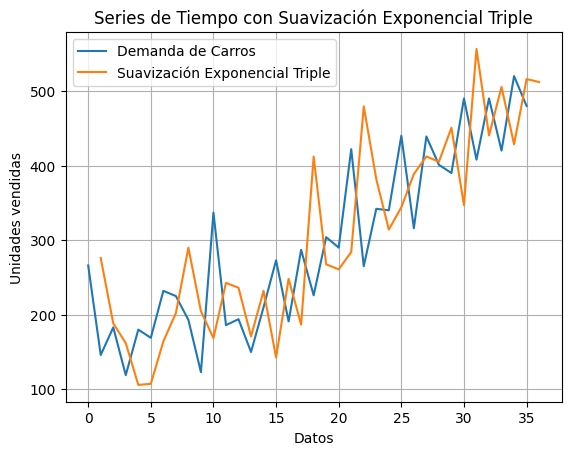

In [13]:
#Graficamos varios de los resultados
plt.plot(df.iloc[:, 1], label = 'Demanda de Carros')
plt.plot(df.iloc[:, 2], label = 'Suavización Exponencial Triple')
plt.grid()
plt.legend(loc = 'best')
plt.title('Series de Tiempo con Suavización Exponencial Triple')
plt.xlabel("Datos")
plt.ylabel("Unidades vendidas")
plt.show()

### MAD

Una medida muy importante utilizada para medir el error global de un tipo de pronóstico es el MAD, el cual es el promedio de los errores. Matemáticamente se define así:

$$ \mathrm{MAD} = \frac{\sum \begin{vmatrix}
\mathrm{Demanda \: Real} - \mathrm{Valor \: Pronosticado}
\end{vmatrix}}{n} $$

In [14]:
#Parámetros necesarios para la optimización
initial_forecast = 266
initial_trend = 10
initial_seasonality = 1
St_initial = [1, 1, 1]
L = 4

In [15]:
def calcular_mad_triple(parameters):
  """
  Calcula el MAD de la Suavización Exponencial Triple tomando
  en cuenta el alpha, el betha y el delta ingresados.

  Args:
    parameters: lista o arreglo con alpha, betha y delta como
    componentes del vector.

  Returns:
    mad: Número float con la desviación absoluta media (MAD).
  """

  alpha = parameters[0]
  betha = parameters[1]
  delta = parameters[2]

  Triple_Exponential_Smoothing = []
  Ft_values = []
  Tt_values = []
  St_values = []
  n = len(df.iloc[:, 1])

  for i in range(n):
    if i == 0:
      Ft_values.append(initial_forecast)
      Tt_values.append(initial_trend)
      St_values.append(initial_seasonality)

    elif i > 0 and i < L:
      Ft = alpha * (df.iloc[i, 1] / St_initial[i - 1]) + (1 - alpha) * (Ft_values[i - 1] + Tt_values[i - 1])
      Ft_values.append(Ft)
      Tt = betha * (Ft_values[i] - Ft_values[i - 1]) + (1 - betha) * Tt_values[i - 1]
      Tt_values.append(Tt)
      St = delta * (df.iloc[i, 1] / Ft_values[i]) + (1 - delta) * St_initial[i - 1]
      St_values.append(St)
      value = (Ft_values[i - 1] + 1 * Tt_values[i - 1]) * St_initial[i - 1]
      Triple_Exponential_Smoothing.append(value)

    else:
      Ft = alpha * (df.iloc[i, 1] / St_values[i - L]) + (1 - alpha) * (Ft_values[i - 1] + Tt_values[i - 1])
      Ft_values.append(Ft)
      Tt = betha * (Ft_values[i] - Ft_values[i - 1]) + (1 - betha) * Tt_values[i - 1]
      Tt_values.append(Tt)
      St = delta * (df.iloc[i, 1] / Ft_values[i]) + (1 - delta) * St_values[i - L]
      St_values.append(St)
      value = (Ft_values[i - 1] + 1 * Tt_values[i - 1]) * St_values[i - L]
      Triple_Exponential_Smoothing.append(value)


  Errors = []
  Sum = 0

  for i in range(1, n - 1):
    Error = np.abs(df.iloc[i, 1] - Triple_Exponential_Smoothing[i - 1])
    Errors.append(Error)

  for i in range(n - 2):
    Sum += Errors[i]

  mad = Sum / (n - 2)

  return mad

In [16]:
calcular_mad_triple([0.5, 0.5, 0.5])

76.15221993963742

### Optimización del Alpha, Betha y Delta

Ahora bien, haciéndo uso de los conocimientos de Analítica I y Matemáticas Aplicadas I, se puede minimizar la función objetivo MAD para obtener el mínimo error.

$ \mathbf{f.o.} $
$$ \mathit{min} \: \: \mathrm{MAD} = \frac{\sum \begin{vmatrix}
\mathrm{Demanda \: Real} - \mathrm{Valor \: Pronosticado}
\end{vmatrix}}{n} $$

$ \mathbf{s.a.} $
$$0 \leq \alpha \leq 1$$

$$0 \leq \beta \leq 1$$

 $$0 \leq \delta \leq 1$$

donde,

$ \alpha = \mathrm{Constante \: de \: Suavizacion}$

$ \beta = \mathrm{Constante \: de \: Tendencia}$

$ \delta = \mathrm{Constante \: de \: Estacionalidad}$

In [17]:
#Realizando la optimización

from scipy import optimize

x0 = [0.5, 0.5, 0.5]

def c1(parameters):
  return parameters[0]

def c2(parameters):
  return parameters[1]

def c3(parameters):
  return parameters[2]

def c4(parameters):
  return -(parameters[0] - 1)

def c5(parameters):
  return -(parameters[1] - 1)

def c6(parameters):
  return -(parameters[2] - 1)

bnds = [(0.0, 1.0), (0.0, 1.0), (0.0, 1.0)]

result = optimize.minimize(calcular_mad_triple, x0, constraints = [{'type':'ineq','fun':f} for f in [c1,c2,c3,c4,c5,c6]],
                           bounds = bnds, method = 'SLSQP')
result

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 51.830095992655735
       x: [ 1.803e-01  3.800e-01  3.435e-16]
     nit: 24
     jac: [ 9.796e+00  1.287e+00  1.380e+01]
    nfev: 127
    njev: 23

In [18]:
#Alpha óptimo
result.x[0]

0.18027077482085146

In [19]:
#Betha óptimo
result.x[1]

0.3799904659256018

In [20]:
#Delta óptimo
result.x[2]

3.435070249311908e-16

In [21]:
#MAD resultante
Optimized_MAD = result.fun
print(Optimized_MAD)

51.830095992655735


### Referencias
*   Heizer, J., & Render, B. (2004). Principios de administración de operaciones.
*   Lind, D. A., Marchal, W. G., & Wathen, S. A. (2005). Estadística aplicada a los negocios y a la economía.